In [28]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from PIL import Image


In [8]:
train_dir = 'F:\cvd\Training_Set\Training'
labels_file = 'F:\cvd\Training_Set\RFMiD_Training_Labels.csv'

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\santh\AppData\Local\Temp\ipykernel_8232\1171319747.py:1: SyntaxWarning: invalid escape sequence '\c'
  train_dir = 'F:\cvd\Training_Set\Training'
C:\Users\santh\AppData\Local\Temp\ipykernel_8232\1171319747.py:2: SyntaxWarning: invalid escape sequence '\c'
  labels_file = 'F:\cvd\Training_Set\RFMiD_Training_Labels.csv'


In [10]:
labels_df = pd.read_csv(labels_file)
labels_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(labels_df.columns)


Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\santh\AppData\Local\Temp\ipykernel_8232\2326722303.py:2: SyntaxWarning: invalid escape sequence '\c'
  img = Image.open('F:\cvd\Training_Set\Training\\1.png')


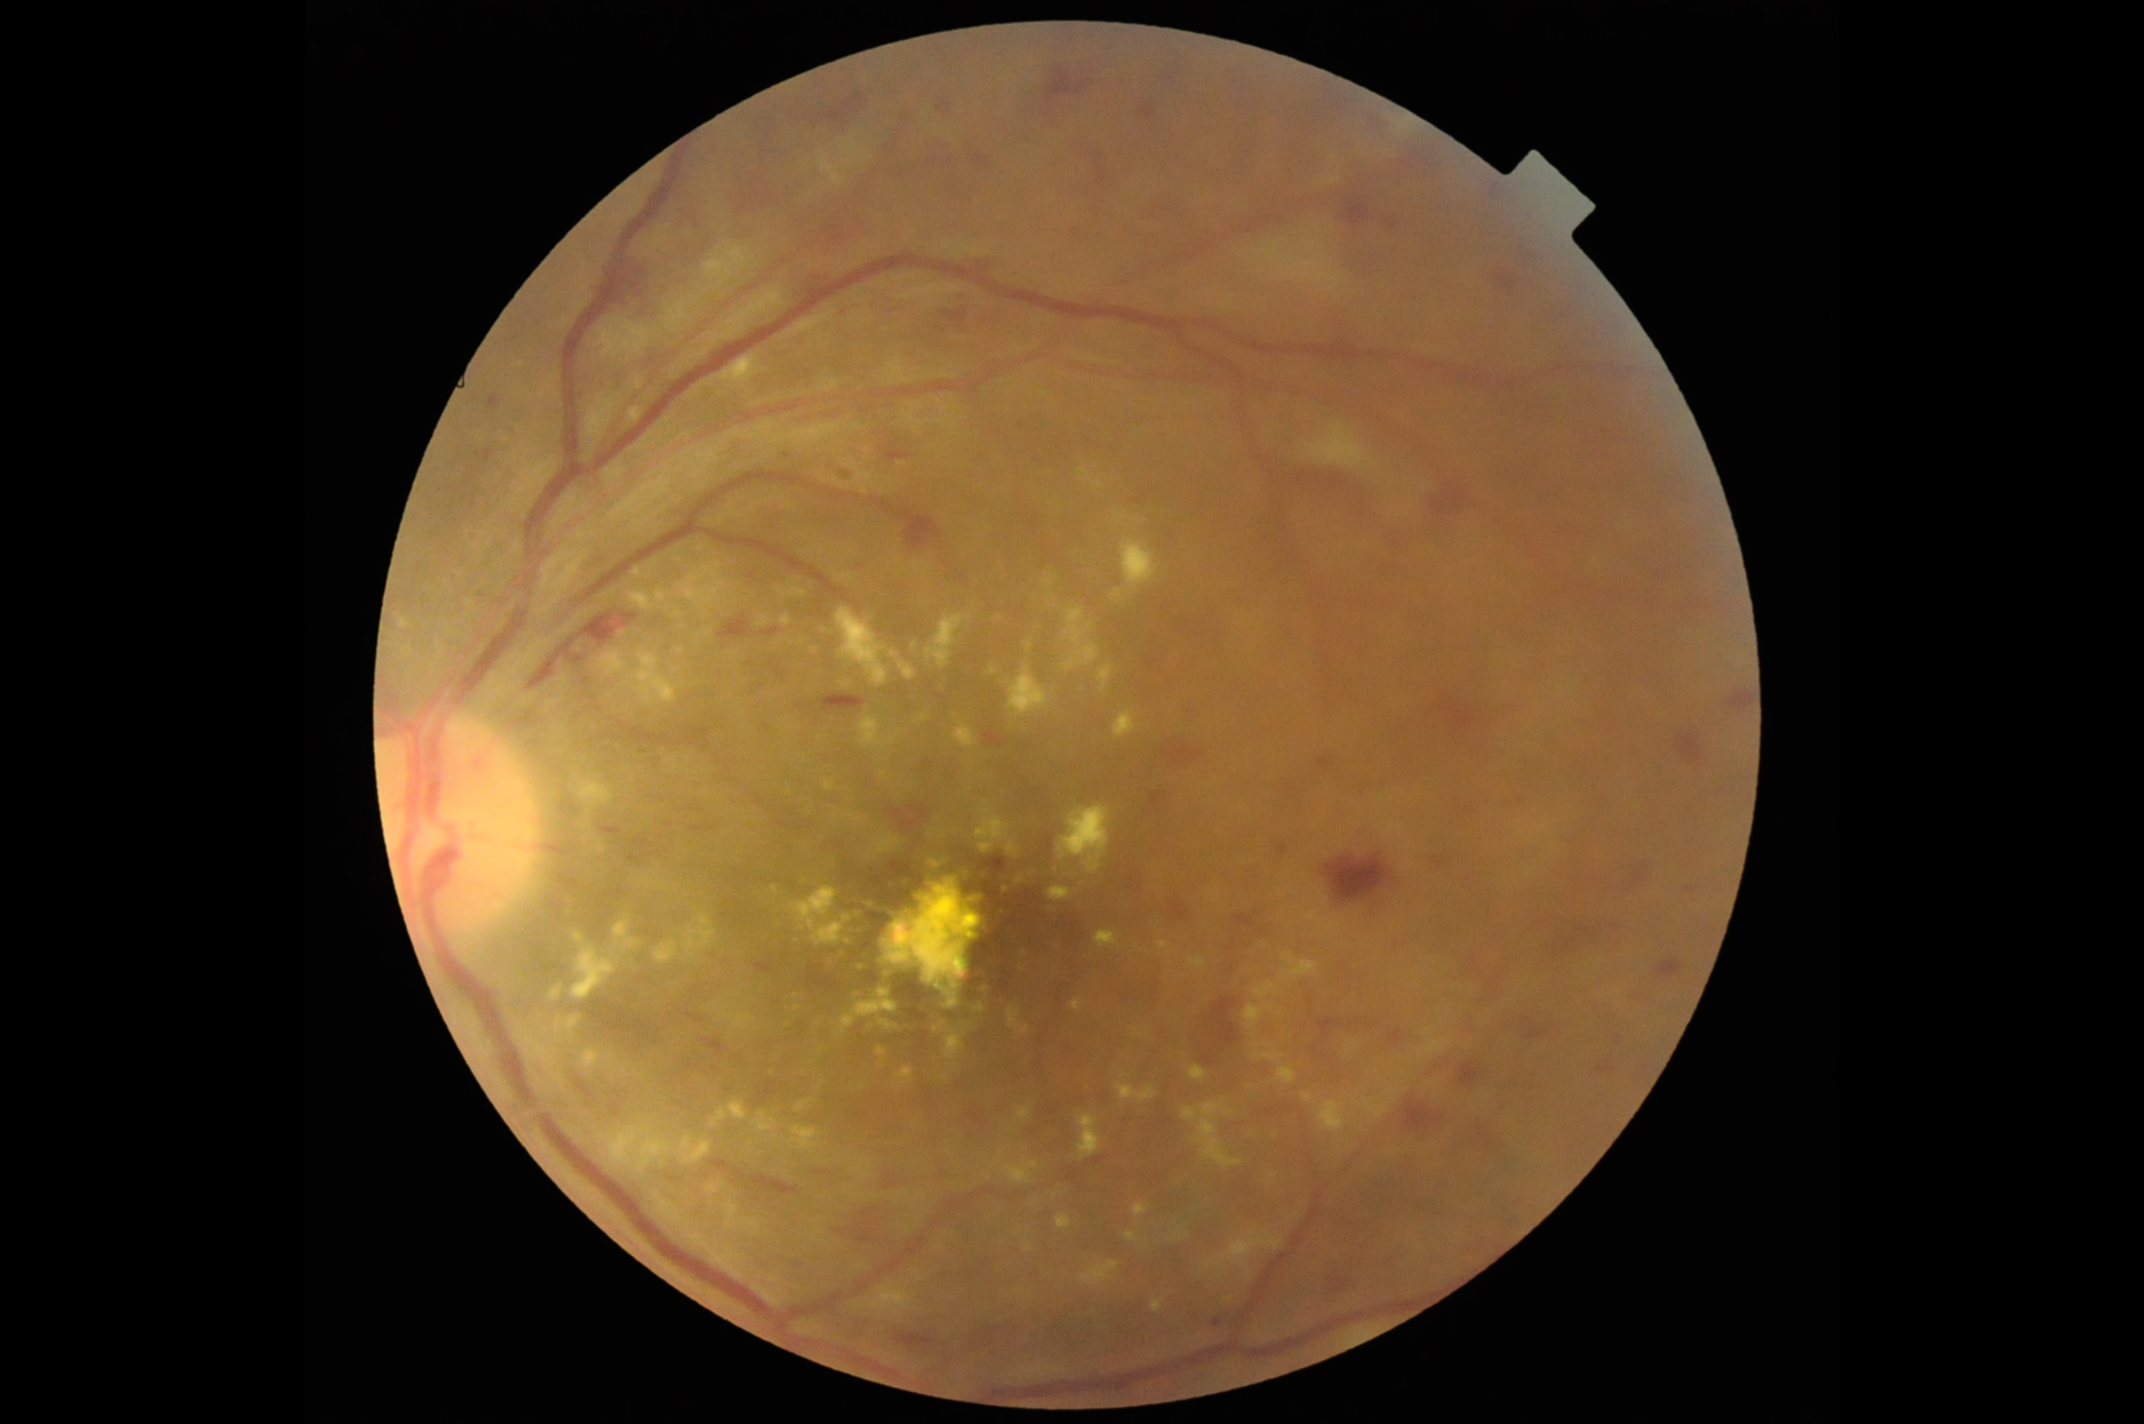

In [23]:
from PIL import Image
img = Image.open('F:\cvd\Training_Set\Training\\1.png')
img


In [29]:
class CustomImageDataGenerator(Sequence):
    def __init__(self, dataframe, directory, batch_size=32, image_size=(128, 128), shuffle=True):
        self.dataframe = dataframe
        self.directory = directory
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.dataframe))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        batch_indexes = self.indexes[start_index:end_index]

        batch_x = []
        batch_y = []

        for i in batch_indexes:
            image_id = self.dataframe.iloc[i]['ID']
            image_path = os.path.join(self.directory, f"{image_id}.png")
            label = self.dataframe.iloc[i]['DR']  # Assuming 'DR' column contains labels (0 or 1)

            # Load and preprocess image
            image = Image.open(image_path)
            image = image.resize(self.image_size)
            image = np.array(image) / 255.0  # Normalize pixel values

            batch_x.append(image)
            batch_y.append(label)

        return np.array(batch_x), np.array(batch_y)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)


In [30]:
# Path to your dataset CSV file
dataset_file = 'F:\cvd\Training_Set\RFMiD_Training_Labels.csv'

# Path to directory containing image files
image_directory = 'F:\cvd\Training_Set\Training'

# Load dataset from CSV file
dataset = pd.read_csv(dataset_file)

# Split dataset into training and validation sets
train_df = dataset.sample(frac=0.8, random_state=42)
valid_df = dataset.drop(train_df.index)

# Create custom data generators
train_generator = CustomImageDataGenerator(train_df, image_directory)
valid_generator = CustomImageDataGenerator(valid_df, image_directory)


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\santh\AppData\Local\Temp\ipykernel_8232\2489247591.py:2: SyntaxWarning: invalid escape sequence '\c'
  dataset_file = 'F:\cvd\Training_Set\RFMiD_Training_Labels.csv'
C:\Users\santh\AppData\Local\Temp\ipykernel_8232\2489247591.py:5: SyntaxWarning: invalid escape sequence '\c'
  image_directory = 'F:\cvd\Training_Set\Training'


In [70]:
# Build your CNN model (similar to previous examples)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using custom data generators
model.fit(train_generator, epochs=5, validation_data=valid_generator)


c:\Users\santh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 432s 8s/step - accuracy: 0.7500 - loss: 0.4830 - val_accuracy: 0.7839 - val_loss: 0.4466
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 474s 8s/step - accuracy: 0.7971 - loss: 0.4377 - val_accuracy: 0.7865 - val_loss: 0.4109
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 909s 11s/step - accuracy: 0.8313 - loss: 0.4037 - val_accuracy: 0.8464 - val_loss: 0.4081
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 545s 10s/step - accuracy: 0.8161 - loss: 0.4010 - val_accuracy: 0.8307 - val_loss: 0.3787
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 788s 16s/step - accuracy: 0.8240 - loss: 0.3981 - val_accuracy: 0.8307 - val_loss: 0.3731


In [72]:
model=model.save('abc.h5')